In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns


# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


# Analyse

In [72]:
# Nucleosome Core Particle
loc = '/Users/thor/surfdrive/Projects/Nucleosome/production_run/'
traj = md.load(loc+'dry.xtc', top=loc+'dry.pdb',stride=250)
traj.center_coordinates()

# find index of residue somewhere in the middle of the nucleosome
indices = traj.top.select('resSeq 73 and chainid 7')
residx = traj.topology.atom(indices[0]).residue.index
anchor_molecules=[set(traj.topology.residue(residx).atoms)]

# put everything in the same box based on the anchor residue
traj = traj.image_molecules(anchor_molecules=anchor_molecules)

In [2]:
# H-NS
path = '/Users/thor/surfdrive/Data/h-ns/NAR/md/0_highaff/FI/drytrajs/'
dna = mdna.load(filename=path+'dry_0.xtc',top=path+'dry_0.pdb')

dna.describe()

DNA structure with 12 base pairs
Sequence: GCAATATATTGC
Trajectory: <mdtraj.Trajectory with 1001 frames, 1588 atoms, 116 residues, and unitcells>
Frames:  (12, 1001, 4, 3)


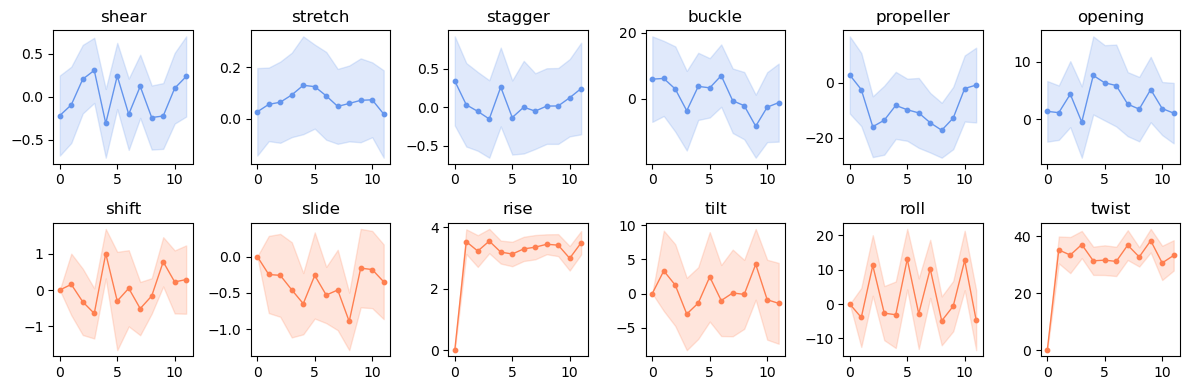

In [3]:
rigid = dna.get_rigid_parameters()
_ = rigid.plot_parameters()

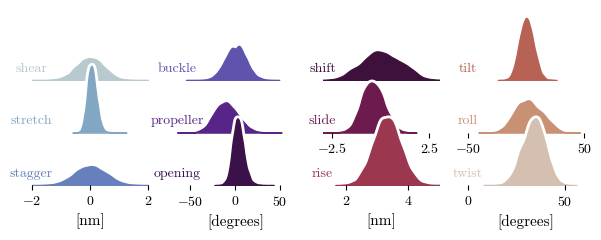

In [7]:
params, names = rigid.get_parameters()  

import matplotlib as mpl, matplotlib.font_manager as font_manager
import seaborn as sns
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True

colors = sns.color_palette("twilight", 12)
lims = [(-2,2),(-2,2),(-2,2),(-65,65),(-65,65),(-65,65)] + [(-3,3),(-3,3),(1.25,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,2.5),sharey='col')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])

    ax[idx][jdx].set_facecolor('none')
    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_yticks([])
    ax[idx][jdx].set_ylabel('')
    if name  in ['shear','buckle','shift','tilt','stretch','propeller']:
        ax[idx][jdx].set_xticks([])
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

    if idx == 0 and jdx in [0,1,2,3]:
        ax[idx][jdx].set_xticklabels([])
    if idx == 1 and jdx in [0,1]:
        ax[idx][jdx].set_xticklabels([])

ax[-1][0].set_xlabel('[nm]',fontsize=11)
ax[-1][1].set_xlabel('[degrees]',fontsize=11)
ax[-1][2].set_xlabel('[nm]',fontsize=11)
ax[-1][3].set_xlabel('[degrees]',fontsize=11)
fig.tight_layout()
fig.subplots_adjust(hspace=-.25)

sns.despine(bottom=True, left=True)
# fig.text(0.25, 0.85, 'Pair Parameters', ha='center',fontsize=10)
# fig.text(0.75, 0.85, 'Step Parameters', ha='center',fontsize=10)

# Build

## Make DNA

In [4]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()

Default sequence: CGCGAATTCGCG
Number of base pairs: 12 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 12

DNA structure with 12 base pairs
Sequence: CGCGAATTCGCG
Trajectory not loaded
Frames:  (12, 1, 4, 3)


In [5]:
# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 10

DNA structure with 10 base pairs
Sequence: GCGCGCGCGC
Trajectory not loaded
Frames:  (10, 1, 4, 3)


'GCGCGCGCGC'

In [ ]:
# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()

## Make minicircle 

Random sequence: ATAAAACTTTCGAGATCCACGGGTTGAACATTCGGACGAGGACAGGGAGATTCTATTACGAAAAGCGACTAACATTAAGGTGTCTAAAATATCTGACATACCTAGGGCCGCCGTCACAAACAATGTAGACGTTCTCTTTAAGGAAAAGTGTATGGTGGATAAAGCTAGAGGCTTTCCAGCTTTCGACTAACCGTTCGCAC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: True
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number o

AttributeError: 'Nucleic' object has no attribute 'save'

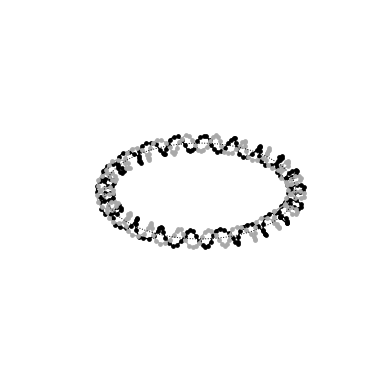

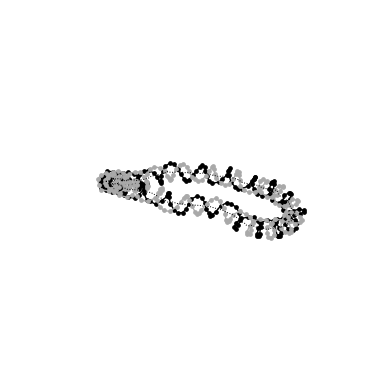

In [116]:
# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save it to a file
dna.save('minimized_nbp_200_closed.pdb')

## Writhe equilibration

In [7]:
# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()

Random sequence: GCGTTCAGGGTAAATCATGTTAAAAGAACGTTGTTACAAAAATGACGGTTTGAAGATAGATCGCTTCCCTCCAAACAAGTTGGGAAAACTGAATGACCCCAGGCGTCAAGTCATAAGTGTTGGTAAATTCTAGATCCGTTACACAACTCGTCGTCGCGGCATAAAGACTAGGGTGAATCGAGTGCCCTTCTAAGCGGCTC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 

Adjusting twist angles to match the given Delta linking number: 8
	Current twist number: 20.00
	Old twist angle per base pair: 36.00 degrees
	Adjusted twist angle per base pair: 50.40 degrees

Circular DNA structure with 200 base pairs
Sequence: GCGTTCAGGGTAAATCATGTTAAAAGAACGTTGTTACAAAAATGACGGTTTGAAGATAGATCGCTTCCCTCCAAACAAGTTGGGAAAACTGAATGACCCCAGGCGTCAAGTCATAAGTGTTGGTAAATTCTAGATCCGTTACACAACTCGTCGTCGCGGCATAAAGACTAGGGTGAATCG

array([28.        ,  2.16148159, 25.83851841])

## Shape Library

Random sequence: TACGATAAGCCCGCTCTCGATAGAAAGTGCAATGCAATGACCGACTCGGTAAGTACATGGTGAGTCGGCGGGGTAAGATTCAATGGGTTAAGAGTTTCATAACACGTTCAATGCACGTCGCGGGAGGGACTAGCCGGCAATGGAAGGGTGACATACCGGCCCTGCCGTCTCTTGAGGAGTACGTGTATGAGGGTTATTGTTCAAACCTAACCGCAGACACTTATTCGCGGGTCATACGCGGGAAAGGAGTAGTCTTAAGTGATCCTTCTGACCCATCGCCCAGGGTGCACAGGTGTCCCG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 300



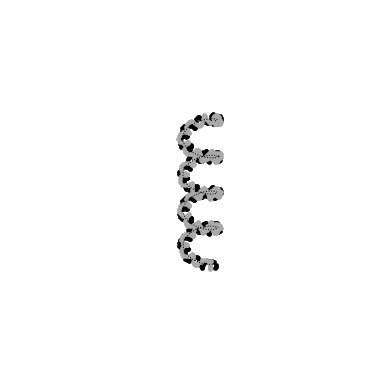

In [30]:
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()

## Custom shapes


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 100

DNA structure with 100 base pairs
Sequence: AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
Trajectory: <mdtraj.Trajectory with 1 frames, 4094 atoms, 200 residues, without unitcells>
Frames:  (100, 1, 4, 3)


'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA'

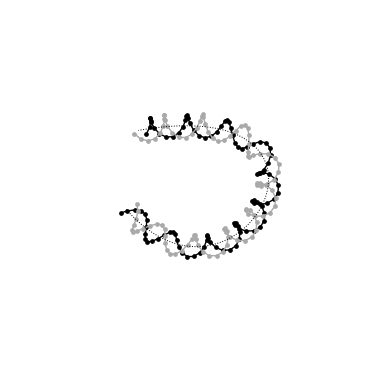

In [10]:
# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence

## Extend

GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 55
   bp per EV bead:     7
   Effective size:     3.622
   Exclusion distance: 4.0
######################################


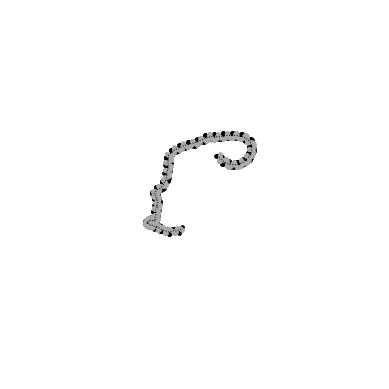

In [15]:
# We can also extend our DNA 
dna.extend(sequence=['G']*120)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*120,forward=False)
dna.draw()

## Connect


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

Random sequence: TTCTGCCGGACTGTCAGCCGTCTGTAGGTTAGTCCGTCTCATTTAGGCACCAACATAGTAGCGAAAGCCCGCGGCCGTGGAGCAGGCGGTTCTGTTTTGG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 102

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300
Circular: False
DNA structure with 118 base pairs
Sequence: AAAAAAAAATTCTGCCGGACTGTCAGC

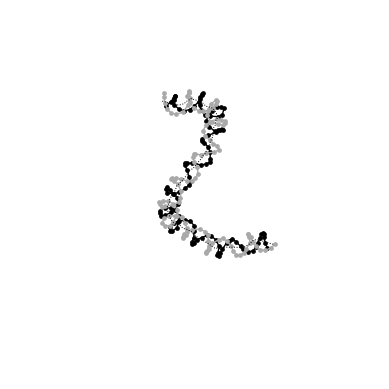

In [80]:
# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()

In [81]:
view = nv.show_mdtraj(dna2.get_traj())
view

NGLWidget()

In [ ]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()


# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()


# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save it to a file
dna.save('minimized_nbp_200_closed.pdb')



# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()


### Shape library
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()


# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence


# We can also extend our DNA 
dna.extend(sequence=['G']*120)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*120,forward=False)
dna.draw()


# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()


# visualize using nglview MC minmization
view = nv.show_mdtraj(dna2.get_MC_traj())
view

# Modify

In [115]:
# Here we make a DNA with the following sequence
dna = mdna.make(sequence='AGCGATATAGA')

# Let's save the original structure
traj = dna.get_traj()
traj.save_pdb('dna_original.pdb')

# Let's mutate the first base to an G and the last base to a C
dna.mutate({0: 'G', dna.n_bp : 'C'},complementary=True)

# Get information about the DNA and see the mutated sequence
dna.describe()

#  use methylation list, here we methylate the 5th position, which is T, so methylation won't work but is caught by the function
dna.methylate(methylations=[5])

# or use the methylation function to methylate all CpG sites
dna.methylate(CpG=True)

# Hoogsteen flip can be done at any base pair, here we flip the 5th base pair
dna.flip(fliplist=[5],deg=180)

# Get trajectory or save as pdb
traj_mod = dna.get_traj()
traj_mod.save_pdb('dna_modified.pdb')


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 11

DNA structure with 11 base pairs
Sequence: GGCGATATAGA
Trajectory: <mdtraj.Trajectory with 1 frames, 445 atoms, 22 residues, without unitcells>
Frames:  (11, 1, 4, 3)
Residue DT6 with methylations index 5 could not be methylated.
Methylate all C in CpG context, superseeds methylations list.
Methtylating: [2]
Flipped residues [5] by 3.141592653589793 radians


In [107]:
dna = mdna.make(sequence='GCAATGCGC')

#  use methylation list
dna.methylate(methylations=[3])

# or use the methylation function
dna.methylate(CpG=True)


dna =  mdna.make(sequence='GCAAAAGC')
dna.flip(fliplist=[4],deg=180)


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 9

Residue DA4 with methylations index 3 could not be methylated.
Methylate all C in CpG context, superseeds methylations list.
Methtylating: [6]


# End

In [3]:

traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('licorice')
view

NGLWidget()

### make minicircle

Random sequence: GCAAGTCTAGATGGCATCTTCGACTTAAGTTTTATTCACGTAGGCACAGGAGAAAATATAACCGATCTGCACAAAGACGTCACCACTAAGGGGAAGCGGCAACAGCGAGACTGGTCAGCAGCCCGAAGAGTCTGAGGTTTCGGGATTAAAGAAACATTATCTGTCGCATCTGCTAGCATCCTCGGCCCATCCAGCAAAGC 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 200

Structure is requested to be circular:
	Excess twist per base to make ends meet: 1.71 degrees
	New twist angle per base pair: 36.0 



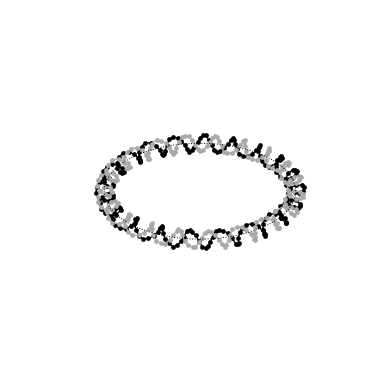

In [4]:
dna = mdna.make(n_bp=200, circular=True)
dna.draw()

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: True
####################################
Initiating Excluded Volume...
EV_bead mismatch: including additional boundary checks.

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 29
   bp per EV bead:     7
   Effective size:     3.57
   Exclusion distance: 4.0
######################################


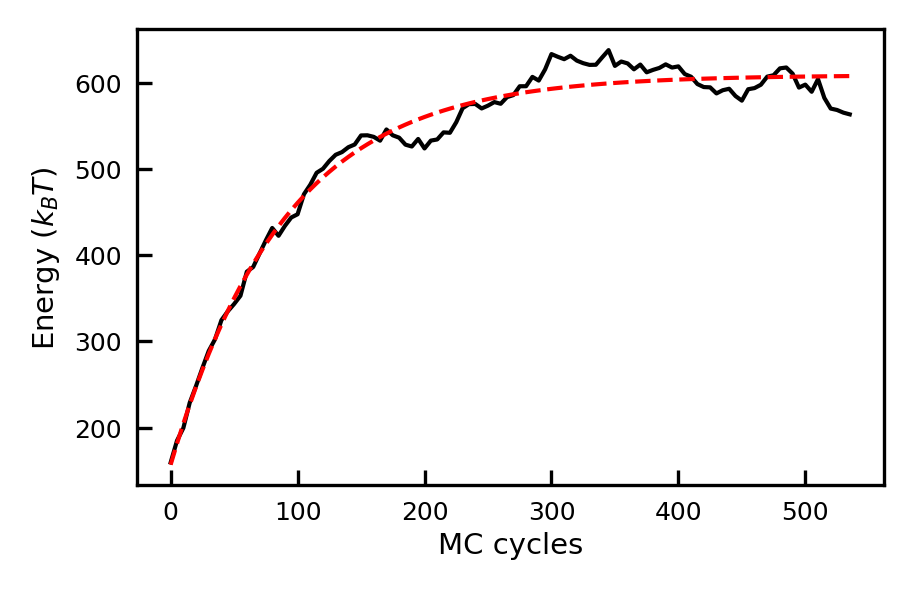

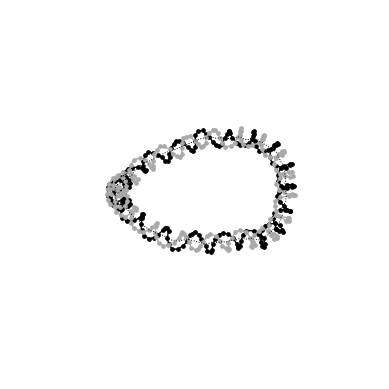

In [5]:
dna.minimize()
dna.draw()

### minicircle with dLk

Random sequence: GAGATATATTATACTCGGGTTTTATTGAGGAAGGTTCCTGAATTCAGTTAAATTGAAGACAAGGTTGAGCCCCGTGGCTTGGCGCTCCGCAGACGCCTTGACCTGGACTTTAGTGCAAAGAGGCAATAGTGAGGGCAATTCGACAATCTGAGGTTAAAATTCCTTGGCATAGGGTGACCCAATATGCGCACTGCGCCTTTATCTTGCTTAACTTTGCCAGGTTTAGGCACGCCCTGCCTTTAAACGGACTTGATACATAAGCTGGCCGACAGACCCCTATGCTTCCAAAGCCAAAATTCCGCTTACGTGTTCTTG 


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 315

Structure is requested to be circular:
	Excess twist per base to make ends meet: 0.00 degrees
	New twist angle per base pair: 34.29 

Adjusting twist angles to match the given Delta linking number: 10
	Current twist number: 30.00
	Old twist angle per base pair: 34.29 degrees
	Adjusted twist angle per base pair: 45.71 degrees



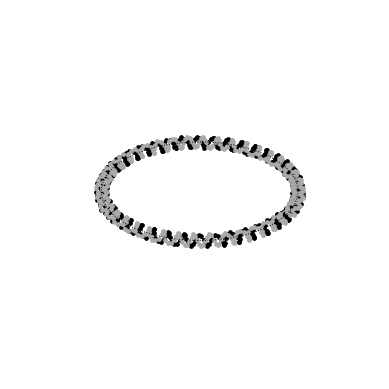

In [41]:
dna = mdna.make(n_bp=315, dLk=10, circular=True)
dna.draw()

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = True 
excluded volume radius = 2.0 
temperature = 300
Circular: True
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 45
   bp per EV bead:     7
   Effective size:     3.57
   Exclusion distance: 4.0
######################################
E1 = 1672.32 kT
E2 = 1556.74 kT
wr_equi=False
wr1 = 1.50
wr2 = 2.79
E = 1502.75 kT
E_num_below=0
wr = 3.13
wr_num_below=0
E = 1506.22 kT
E_num_below=1
wr = 3.24
wr_num_below=0
E = 1487.27 kT
E_num_below=0
wr = 3.04
wr_num_below=1
E = 1499.97 kT
E_num_below=1
wr = 3.17
wr_num_below=2
E = 1492.84 kT
E_num_below=2
wr = 3.32
wr_num_below=0
E = 1503.33 kT
E_num_below=3
wr = 3.43
wr_num_below=0
wr = 3.40
wr_num_below=1
wr = 3.31
wr_num_below=2
wr = 3.27
wr_num_below=3


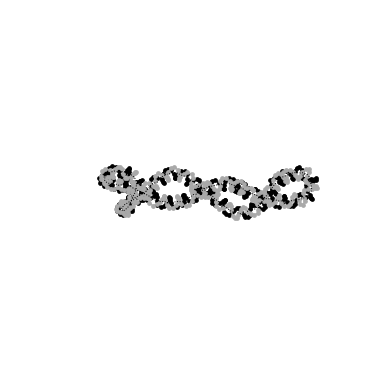

In [42]:
dna.minimize(equilibrate_writhe=True)
dna.draw() 

In [43]:
mc_traj = dna.get_MC_traj()
view = nv.show_mdtraj(mc_traj)
view

NGLWidget(max_frame=1020)

In [32]:
dna.get_linking_number()

using numba


array([28.        ,  1.06176056, 26.93823944])

In [44]:
traj = dna.get_traj()
traj.save('test.pdb')

#### extend


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 2
   bp per EV bead:     7
   Effective size:     3.572
   Exclusion distance: 4.0
######################################
Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING E

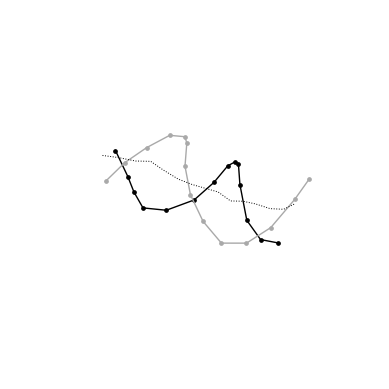

In [19]:
dna = mdna.make('GGGGG')
dna.extend(sequence='AAAAA')
dna.extend(sequence='CCCCC',forward=False)

dna.draw()
dna.describe()

Random sequence: GTGGTCCCCCTTCCCATTGG 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 2.0 
temperature = 300
Circular: False
####################################
Initiating Excluded Volume...

######################################
#### INITIALIZING EXCLUDED VOLUME ####
######################################
 Excluded Volume Beads: 
   number of EV beads: 5
   bp per EV bead:     7
   Effective size:     3.571
   Exclusion distance: 4.0
######################################


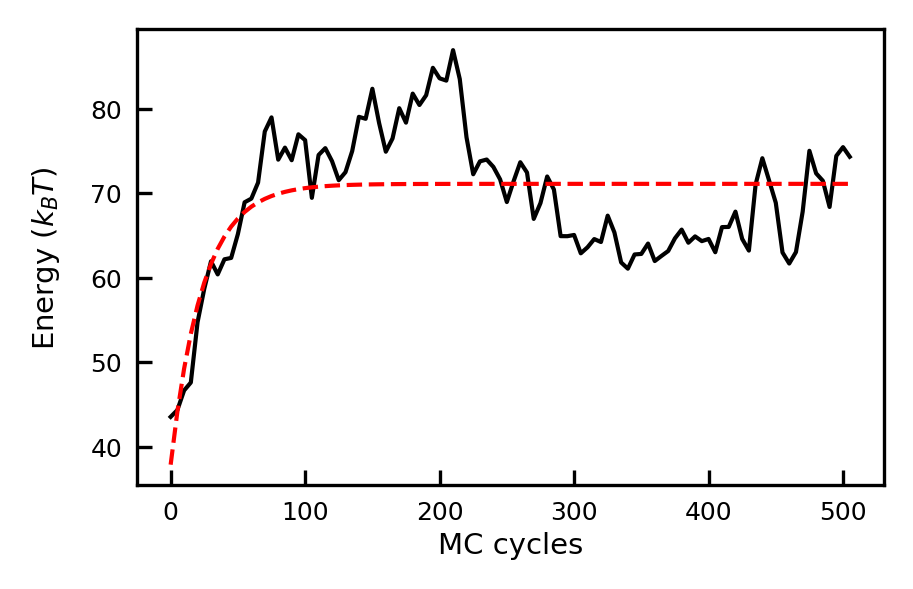

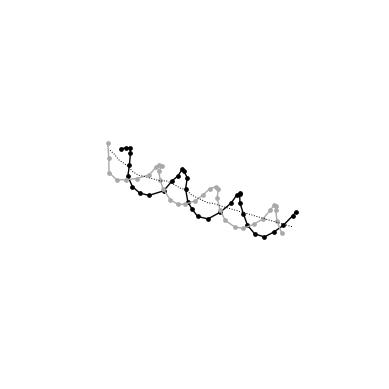

In [14]:
dna.extend(n_bp=20, forward=False)
dna.draw()

### Connect




Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5


Start rescaling spline based on requested number of base pairs.
	This requires recomputation of the control points to match the desired number of base pairs.
	Spline scaled to match the target number of base pairs: 5

Random sequence: CGTTCGCTTATTCGGAGTAGGCTACAGATCCTGTGTTACTCGTCCGT 

Minimize the DNA structure:
simple equilibration = False 
equilibrate writhe = False 
excluded volume radius = 0.0 
temperature = 300
Circular: False
DNA structure with 57 base pairs
Sequence: AAAAACGTTCGCTTATTCGGAGTAGGCTACAGATCCTGTGTTACTCGTCCGTGGGGG
Trajectory: <mdtraj.Trajectory with 1 frames, 2331 atoms, 114 residues, without unitcells>
Frames:  (57, 1, 4, 3)


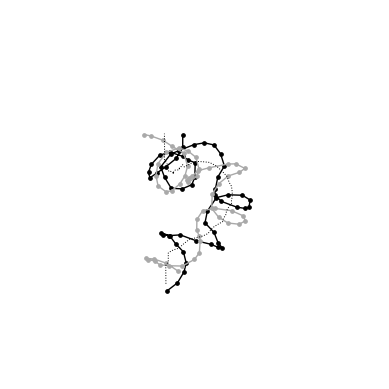

In [24]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))

dna2 = mdna.connect(dna0,dna1, n_bp=50)
dna2.draw()
dna2.describe()

In [25]:
view = nv.show_mdtraj(dna2.get_MC_traj())
view

NGLWidget(max_frame=927)

#### add connect

In [ ]:
dna.extend?

In [ ]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))

dna2 = mdna.connect(dna0,dna1)
#dna2.minimize(exvol_rad=2)

In [ ]:
view = nv.show_mdtraj(dna2.get_MC_traj()[::1])
view

In [ ]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([20,20,0]))

dna2 = mdna.connect(dna0,dna1,n_bp=10)#sequence='AAAAAGGGGG')
#dna2.minimize(exvol_rad=0.5)
view = nv.show_mdtraj(dna2.get_MC_traj()[::50])
view

#### add extend  

In [ ]:
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))
dna1.draw(triads=True)

In [ ]:
dna =  mdna.make(sequence='AAAAAAA')
print(dna.describe())
# dna.extend(24,forward=True,minimize=False)
# print(dna.describe())
# dna.extend(24,forward=False,minimize=False)
# print(dna.sequence)
# #, dna.sequence, dna.describe()

In [ ]:
print(dna.describe())

In [ ]:
dna.draw(triads=True)

In [ ]:
new_dna.extend(24,forward=True)
newest_dna = new_dna.new_nuc
newest_dna.draw()   
newest_dna.n_bp

#### fix mutations

In [ ]:
dna =  mdna.make(sequence='GCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    print(idx, [at.name for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='TCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1

In [ ]:
dna =  mdna.make(sequence='ATGCUDETLMBSZP')
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('ball+stick')
view

In [ ]:
dna =  mdna.make(sequence='GCC')
print(dna.sequence)
dna.mutate(mutations={2: 'P'},complementary=False)#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1

In [ ]:
traj = dna.get_traj()

view = nv.show_mdtraj(traj) 
view.clear()
view.add_representation('licorice')
view

In [ ]:
dna =  mdna.make(sequence='CGCGATATAGC')
print(dna.sequence)
dna.methylate(CpG=True)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='GAG')
print(dna.sequence)
dna.flip(fliplist=[1],deg=180)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='GAG')
view = nv.show_mdtraj(dna.get_traj())
view.clear()
view.add_representation('licorice')
view

In [ ]:
dna = mdna.make(n_bp=120,control_points=mdna.Shapes.circle(1),closed=True,dLk=5)
dna.minimize(equilibrate_writhe=True)

In [ ]:
dna = mdna.make(n_bp=300,control_points=mdna.Shapes.trefoil(1),closed=True,dLk=12)
dna.minimize(equilibrate_writhe=True)

In [ ]:
mc = dna.get_MC_traj()
view = nv.show_mdtraj(mc[::50])
view.clear()
view.add_representation('line', selection='all')
view

In [ ]:
dna.draw(triads=True,backbone=False)

In [ ]:
dna = mdna.make(n_bp=100)
dna.draw()

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.draw()
nuc.minimize(equilibrate_writhe=True,simple=True,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc.pdb')

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc_expmin.pdb')

In [ ]:
nuc.draw()

In [ ]:
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('line')
view

In [ ]:
traj.save('circle_315bp_dlk5.pdb')

In [ ]:
pdb = mdna.sequence_to_pdb('CAT')

In [ ]:
traj = mdna.sequence_to_md('CAT')

In [ ]:
nuc = mdna.compute_rigid_parameters(traj)
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

In [13]:
path  = '/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI_simulations/0_k/8_Haff/' #0_3GC'
i =0
traj = md.load(path+f'dry_{i}_run.xtc', top=path+f'dry_{i}_run.pdb',stride=10).remove_solvent()
traj = traj.atom_slice(traj.top.select('not protein'))
traj = traj.superpose(traj,0)
traj
nuc = mdna.compute_rigid_parameters(traj)

import matplotlib as mpl, matplotlib.font_manager as font_manager
import seaborn as sns
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True


In [10]:
import seaborn as sns
params, names = nuc.get_parameters()

Text(0.75, 0.95, 'Step Paramters')

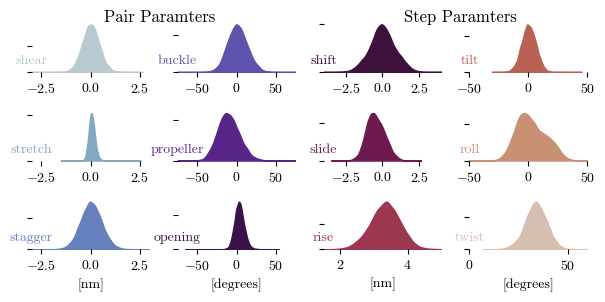

In [14]:
colors = sns.color_palette("twilight", 12)
lims = [(-3,3),(-3,3),(-3,3),(-75,75),(-75,75),(-75,75)] + [(-4,4),(-4,4),(1.5,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,3))#,sharey='row')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])


    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_ylabel('')
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

ax[-1][0].set_xlabel('[nm]')
ax[-1][1].set_xlabel('[degrees]')
ax[-1][2].set_xlabel('[nm]')
ax[-1][3].set_xlabel('[degrees]')
fig.tight_layout()
#fig.subplots_adjust(hspace=-0)

sns.despine(bottom=True, left=True)
fig.text(0.25, 0.95, 'Pair Paramters', ha='center',fontsize=12)
fig.text(0.75, 0.95, 'Step Paramters', ha='center',fontsize=12)
# fig.savefig('parameters.png',dpi=300,bbox_inches='tight')


Text(0.75, 0.85, 'Step Parameters')

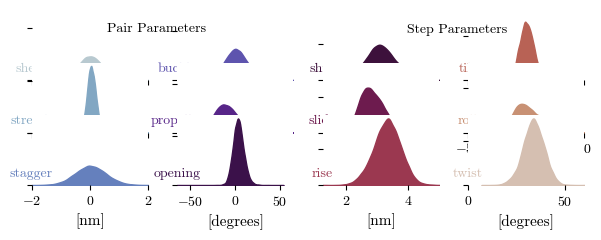

In [16]:
colors = sns.color_palette("twilight", 12)
lims = [(-2,2),(-2,2),(-2,2),(-65,65),(-65,65),(-65,65)] + [(-3,3),(-3,3),(1.25,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,2.5),sharey='col')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])


    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_ylabel('')
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

    if idx == 0 and jdx in [0,1,2,3]:
        ax[idx][jdx].set_xticklabels([])
    if idx == 1 and jdx in [0,1]:
        ax[idx][jdx].set_xticklabels([])

ax[-1][0].set_xlabel('[nm]',fontsize=11)
ax[-1][1].set_xlabel('[degrees]',fontsize=11)
ax[-1][2].set_xlabel('[nm]',fontsize=11)
ax[-1][3].set_xlabel('[degrees]',fontsize=11)
fig.tight_layout()
fig.subplots_adjust(hspace=-.25)

sns.despine(bottom=True, left=True)
fig.text(0.25, 0.85, 'Pair Parameters', ha='center',fontsize=10)
fig.text(0.75, 0.85, 'Step Parameters', ha='center',fontsize=10)

In [ ]:
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

#### Test with mdtraj 

In [ ]:
mdna.make(sequence, control_points, nbp, closed)

In [ ]:
nuc = mdna.load(traj)
nuc.describe()
nuc.draw()#triads=False,lw=5, helical_axis=True,markersize=10)

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape, n_bp=100, closed=True, dLk=5)
nuc.draw()

In [ ]:
nuc.frames.shape

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.draw()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=0.0, temp=300)
nuc.draw()

In [ ]:
nuc.draw()

In [ ]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots( len(size),len(lk), figsize=(len(lk)*n,len(size)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,l in enumerate(lk):
    for j,s in enumerate(size):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [ ]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots(len(lk),  len(size),figsize=(len(size)*n,len(lk)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,s in enumerate(size):
    for j,l in enumerate(lk):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [ ]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=100,dLk=0,closed=True)


nuc = mdna.load(frames=spline.frames)
nuc.describe()



In [ ]:
rigid = nuc.get_rigid_parameters()
fig, ax = rigid.plot_parameters(step=True,base=False)


In [ ]:
nuc.draw(triads=False,backbone=True)

In [ ]:
nuc.draw()

In [ ]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=120,dLk=-3)
frames = spline.frames
nuc = mdna.load(frames=frames,sequence=''.join(['A']*len(frames)))
nuc.n_bp, nuc.sequence
nuc.draw()

In [ ]:
%matplotlib inline  
plt.plot(rigid.get_parameter('tilt')[0])  
plt.plot(rigid.get_parameter('roll')[0])
plt.plot(rigid.get_parameter('twist')[0])
plt.show()

In [ ]:
%matplotlib ipympl
phosphor_A  = traj.top.select('name P and chainid 0')
phosphor_B  = traj.top.select('name P and chainid 1')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

frames = nuc.mean_reference_frames
print(frames.shape)
helical_axis = frames[:,0,0]
print(helical_axis.shape)
ax.plot(helical_axis[:,0],helical_axis[:,1],helical_axis[:,2],':',c='k',markersize=5)

ax.plot(traj.xyz[0,phosphor_A,0],traj.xyz[0,phosphor_A,1],traj.xyz[0,phosphor_A,2],'-o',c='k',markersize=3)
ax.plot(traj.xyz[0,phosphor_B,0],traj.xyz[0,phosphor_B,1],traj.xyz[0,phosphor_B,2],'-o',c='k',markersize=3)
ax.axis('equal')
ax.axis('off')